## Import Libraries

In [14]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import dtale as dt
from sklearn import metrics

%matplotlib inline

## Load the Data

In [28]:
df = pd.read_csv("final_data.csv")

In [37]:
dt.show(df)

In [29]:
df.shape

(10754, 22)

In [30]:
df.head(2)

player               team          name  \
0   /david-de-gea/profil/spieler/59377  Manchester United  David de Gea   
1  /jack-butland/profil/spieler/128899  Manchester United  Jack Butland   

     position  height   age  appearance  goals  assists  yellow cards  ...  \
0  Goalkeeper   189.0  32.0         104    0.0      0.0      0.009585  ...   
1  Goalkeeper   196.0  30.0          15    0.0      0.0      0.069018  ...   

   goals conceded  clean sheets  minutes played  days_injured  games_injured  \
0        1.217252      0.335463            9390            42              5   
1        1.242331      0.207055            1304           510             58   

   award  current_value  highest_value  position_encoded  winger  
0     13       15000000       70000000                 1       0  
1      1        1500000       22000000                 1       0  

[2 rows x 22 columns]

## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [17]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]

Empty DataFrame
Columns: [player, team, name, position, height, age, appearance, goals, assists, yellow cards, second yellow cards, red cards, goals conceded, clean sheets, minutes played, days_injured, games_injured, award, current_value, highest_value, position_encoded, winger]
Index: []

[0 rows x 22 columns]

In [18]:
# Completeness
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [19]:
# Accurecy types
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [20]:

categorical_features = ['height',
                        'age',
                        'appearance',
                        'goals',
                        'assists', 
                        'ellow cards' ,
                        'second yellow cards',
                        'red cards ',
                        'goals' ,
                        'conceded',
                         'clean',
                         'sheets', 
                        'minutes', 
                        'played', 
                        'days_injured',
                         'games_injured' ,
                        'current_value ',
                        'highest_value ', 
                        'position_encoded',
                         'winger ' ]
numeric_features = ['player','team ','name','position ']

In [6]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


In [7]:
df = pd.read_csv("final_data.csv")

In [8]:
KNeighbors_Classifier = KNeighborsClassifier() 

In [9]:
correlation_matrix = df.corr()

# Extract the correlations with the 'highest_value' column
correlations_with_highest_value = correlation_matrix["highest_value"]

# Find the column with the highest correlation to 'highest_value', excluding itself
highest_corr_column = correlations_with_highest_value.drop("highest_value").idxmax()
highest_corr_value = correlations_with_highest_value.drop("highest_value").max()

print("Column with highest correlation to 'highest_value':", highest_corr_column)
print("Highest correlation value:", highest_corr_value)

Column with highest correlation to 'highest_value': current_value
Highest correlation value: 0.8345530981111612


/var/folders/p8/mjqd4kfn2kj_3x0vmsrp0jfh0000gn/T/ipykernel_2308/1164728659.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [12]:

thresholds = {
    'high price': df['highest_value'].quantile(0.75),
    'good price': df['highest_value'].quantile(0.50),
    'cheap price': df['highest_value'].quantile(0.25)
}

# Function to categorize values
def categorize_value(value):
    if value >= thresholds['high price']:
        return 'high price'
    elif value >= thresholds['good price']:
        return 'good price'
    else:
        return 'cheap price'

# Apply the categorize_value function to create the 'price_category' column
df['price_category'] = df['highest_value'].apply(categorize_value)

# Map categories to numerical values for encoding
df['price_category_encoded'] = df['price_category'].map({
    'cheap price': 0,
    'good price': 1,
    'high price': 2
})

# Define the features and target variable
features = ['appearance','minutes played', 'award', 'current_value']
X = df[features]
y = df['price_category_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)






In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=.2)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
param_grid = {
    'n_neighbors':[1,2,5,6,7,9]
    
}


# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=KNeighbors_Classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro',
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


best_params = grid_search.best_params_
best_svm_classifier = grid_search.best_estimator_



Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [17]:
y_pred=best_svm_classifier.predict(X_test_scaled)

## knn model

In [18]:


accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
# print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy}")
print(f"F1 Macro: {f1_macro}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7768479776847977
F1 Macro: 0.7327582861693461
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1070
           1       0.59      0.53      0.56       505
           2       0.86      0.70      0.77       576

    accuracy                           0.78      2151
   macro avg       0.75      0.72      0.73      2151
weighted avg       0.77      0.78      0.77      2151

Confusion Matrix:
[[1003   61    6]
 [ 178  266   61]
 [  53  121  402]]


(5364, 11)

In [ ]:
df = df[(df['Price']<=350000) & (df['Price']>=5000)]

In [ ]:
df.shape

(3566, 11)

In [ ]:
#df[df['Mileage']<1000]

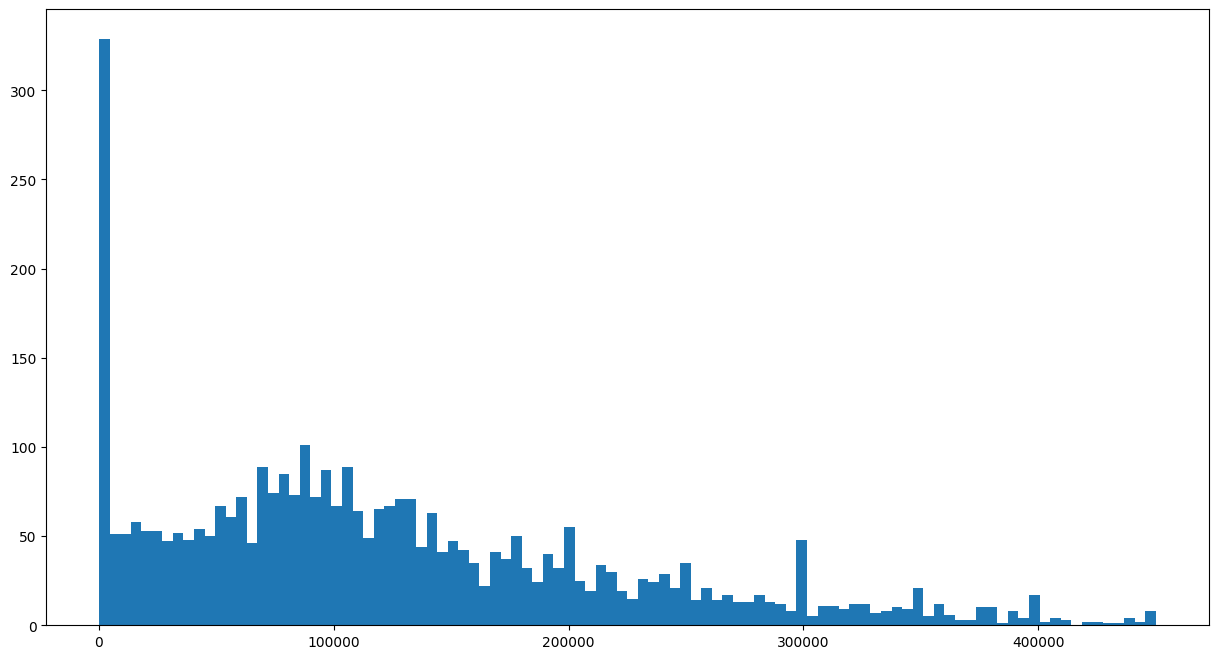

In [ ]:
plt.figure(figsize=(15,8))
#plt.boxplot(df['Mileage']);
plt.hist(df[df['Mileage']<=450000]['Mileage'], bins=100);
#plt.hist(df['Mileage'], bins=100);

In [ ]:
df = df[df['Mileage']<=450000]
df.shape

(3511, 11)

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [ ]:
df.head(2)

Type  Region        Make  Gear_Type       Origin Options  Year  \
1        Yukon  Riyadh         GMC  Automatic        Saudi    Full  2014   
2  Range Rover  Riyadh  Land Rover  Automatic  Gulf Arabic    Full  2015   

   Engine_Size  Mileage  Negotiable   Price  
1          8.0    80000       False  120000  
2          5.0   140000       False  260000

In [ ]:
categorical_features

['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options']

In [ ]:
# one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [ ]:
df.shape

(3511, 325)

In [ ]:
df.head(2)

Year  Engine_Size  Mileage  Negotiable   Price  Type_3  Type_300  \
1  2014          8.0    80000       False  120000   False     False   
2  2015          5.0   140000       False  260000   False     False   

   Type_3008  Type_301  Type_5  ...  Make_Zhengzhou  Gear_Type_Automatic  \
1      False     False   False  ...           False                 True   
2      False     False   False  ...           False                 True   

   Gear_Type_Manual  Origin_Gulf Arabic  Origin_Other  Origin_Saudi  \
1             False               False         False          True   
2             False                True         False         False   

   Origin_Unknown  Options_Full  Options_Semi Full  Options_Standard  
1           False          True              False             False  
2           False          True              False             False  

[2 rows x 325 columns]

In [ ]:
# Calculate the 35th and 75th percentiles of the price
p35 = df['Price'].quantile(0.35)
p75 = df['Price'].quantile(0.75)

# Function to categorize prices
def categorize_price(price):
    if price < p35:
        return 'Cheap_Price'
    elif price < p75:
        return 'Good_Price'
    else:
        return 'High_Price'

# Apply the function to create a new column
df['car_price_category'] = df['Price'].apply(categorize_price)

df.drop('Price', axis=1, inplace=True)

# Verify the distribution of the new categories
print(df['car_price_category'].value_counts())

car_price_category
Good_Price     1404
Cheap_Price    1227
High_Price      880
Name: count, dtype: int64


In [ ]:
p35, p75

(46000.0, 95000.0)

In [ ]:
#df['car_price_category'] 

In [ ]:
encoder = LabelEncoder()
df['car_price_category_encoded'] = encoder.fit_transform(df['car_price_category'])  

#### 3. Feature selection

In [ ]:
# sns.heatmap(df.corr(), annot=True);

In [ ]:
correlation = df.corr(numeric_only=True)
#print(correlation['Price'].sort_values(ascending=False))
print(correlation['car_price_category_encoded'].sort_values(ascending=False))

car_price_category_encoded    1.000000
Year                          0.407525
Engine_Size                   0.334464
Options_Full                  0.305622
Make_Mercedes                 0.225376
                                ...   
Make_Hyundai                 -0.223059
Type_Accent                  -0.237844
Options_Standard             -0.283697
Mileage                      -0.287567
Negotiable                         NaN
Name: car_price_category_encoded, Length: 325, dtype: float64


In [ ]:
# Set the correlation threshold
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['car_price_category_encoded']) > \
threshold]['car_price_category_encoded'].index
selected_features

Index(['Year', 'Engine_Size', 'Mileage', 'Type_Accent', 'Type_Land Cruiser',
       'Make_Hyundai', 'Make_Mercedes', 'Options_Full', 'Options_Standard',
       'car_price_category_encoded'],
      dtype='object')

In [ ]:
selected_features = ['Year', 'Engine_Size', 'Mileage', 'Type_Accent', 'Type_Land Cruiser',
                      'Make_Hyundai', 'Make_Mercedes', 'Options_Full', 'Options_Standard',
                      'car_price_category_encoded']

In [ ]:
df = df[selected_features]
df.head()

Year  Engine_Size  Mileage  Type_Accent  Type_Land Cruiser  Make_Hyundai  \
1  2014          8.0    80000        False              False         False   
2  2015          5.0   140000        False              False         False   
3  2015          2.4   220000        False              False         False   
5  2019          2.0    25000        False              False         False   
6  2012          4.8   189000        False              False         False   

   Make_Mercedes  Options_Full  Options_Standard  car_price_category_encoded  
1          False          True             False                           2  
2          False          True             False                           2  
3          False         False             False                           0  
5          False         False             False                           1  
6          False          True             False                           1

#### 4. Prepare train and test data

In [ ]:
# Prepare data
X = df.drop(['car_price_category_encoded'], axis=1)
y = df['car_price_category_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X.shape

(3511, 9)

## Buliding the Model

In [ ]:
svm_classifier = SVC() 

In [ ]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],   # Regularization strength
    'C':[ 15, 20, 25, 30],
    'gamma': [1,2,6]
}
grid_search = GridSearchCV(estimator=svm_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

## Train the Model

In [ ]:
# Fit the model on the training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [ ]:
grid_search.best_params_

In [ ]:
model = grid_search.best_estimator_

## Test the Model

In [ ]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Evaluating the Model 

In [ ]:
# our benchmark model
base_model = round(df['car_price_category_encoded'].value_counts()[1]/df.shape[0]*100, 2)
base_model

39.99

1. Accuracy

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7894736842105263

In [ ]:
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.782051282051282

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[191,  49,   3],
       [ 33, 225,  22],
       [  3,  38, 139]])

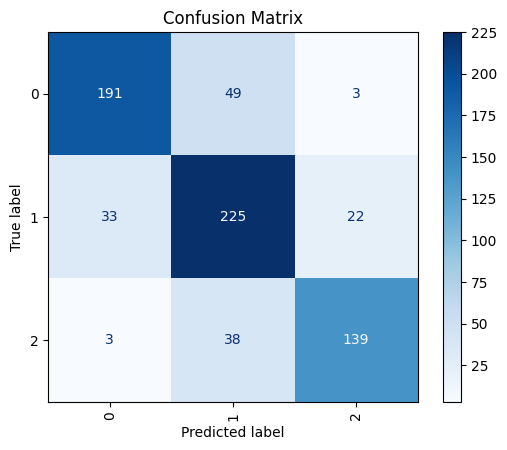

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calculate Precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.80


In [ ]:
# Calculate Recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.79


In [ ]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.79
